In [2]:
import pandas as pd
# NumPy provides a multidimensional array object. Commonly used for scientific computing
import numpy as np
# Matplotlib library used for creating static, animated, and interacted visualizations
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Let's take a look at our CSV file

In [3]:
df = pd.read_csv('/Users/nicholascaro/Downloads/creditcard.csv')

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### We check for null values in the data frame

In [5]:
df.isnull().values.any()

False

### Let's check how many fraud cases we have in the data frame

In [7]:
is_fraud = len(df[df.Class == 1])
not_fraud = len(df[df.Class == 0])
total = is_fraud + not_fraud
percentage_of_fraud = (is_fraud/total) * 100
print(f"Is Fraud: {is_fraud}")
print(f"Not Fraud: {not_fraud}")
print(f"Total Amount of Cases: {total}")
print(f"Percentage of Fraud: {percentage_of_fraud}")

Is Fraud: 492
Not Fraud: 284315
Total Amount of Cases: 284807
Percentage of Fraud: 0.1727485630620034


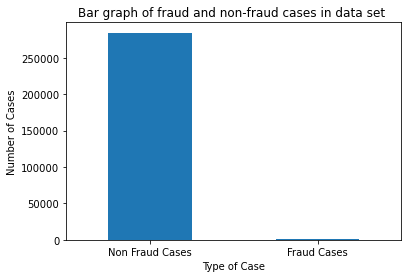

In [8]:
count_classes = df.value_counts(df['Class'], sort=True)
labels = ['Non Fraud Cases', 'Fraud Cases']
count_classes.plot(kind='bar', rot=0)
plt.title("Bar graph of fraud and non-fraud cases in data set ")
plt.ylabel('Number of Cases')
plt.xlabel('Type of Case')
plt.xticks(range(2), labels)
plt.show()

### We will use StandardScaler() to reduce the wide range of inputs in our Amount column.

In [9]:
scaler = StandardScaler()
df['NormalizedAmount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))


### We drop the Amount and Time columns from our data frame. Then, split our data. 

In [11]:
columns_to_drop = ['Amount', 'Time']
df = df.drop(columns_to_drop, axis = 1)
y = df['Class']
x = df.drop(['Class'], axis = 1) 

### Model 1. Decision Tree with Gini and Entropy

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state=0)

In [98]:
def train_with_gini_index(x_train, x_test, y_train):
    gini_object = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth=3, min_samples_leaf = 5)
    gini_object.fit(x_train, y_train)
    return gini_object
    
def train_with_entropy(x_train, x_test, y_train):
    entropy_object = DecisionTreeClassifier(criterion = 'entropy', random_state = 100, max_depth=3, min_samples_leaf = 5)
    entropy_object.fit(x_train, y_train)
    return entropy_object

def prediction(x_test, criterion_object):
    y_prediction = criterion_object.predict(x_test)
    print("These are the prediction values:", y_prediction)
    return y_prediction

def get_accuracy(y_test, y_pred):
    print("The Cofusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred)*100)
    print("Report:", classification_report(y_test, y_pred))

In [99]:
def main():
    gini = train_with_gini_index(x_train, x_test, y_train)
    entropy = train_with_entropy(x_train, x_test, y_train)
    
    print("Gini Results\n")
    
    y_pred_gini = prediction(x_test, gini)
    get_accuracy(y_test, y_pred_gini)
    
    print("Entropy Results\n")
    
    y_pred_entropy = prediction(x_test, entropy)
    get_accuracy(y_test, y_pred_entropy)

if __name__ == "__main__":
    main()

Gini Results

These are the prediction values: [0 0 0 ... 0 0 0]
The Cofusion Matrix:
 [[85273    23]
 [   40   107]]
Accuracy: 99.92626663389628
Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.82      0.73      0.77       147

    accuracy                           1.00     85443
   macro avg       0.91      0.86      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Entropy Results

These are the prediction values: [0 0 0 ... 0 0 0]
The Cofusion Matrix:
 [[85278    18]
 [   35   112]]
Accuracy: 99.93797034280163
Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.86      0.76      0.81       147

    accuracy                           1.00     85443
   macro avg       0.93      0.88      0.90     85443
weighted avg       1.00      1.00      1.00     85443



##### Since Entropy has a higher accuracy, we will create a confusion matrix with our entropy criterion Desicion Tree. 

In [106]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
entropy_object = DecisionTreeClassifier(criterion = 'entropy', random_state = 100, max_depth=3, min_samples_leaf = 5)
entropy_object.fit(x_train_scaled, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [107]:
y_pred_entropy = entropy_object.predict(x_test_scaled)

In [108]:
print("Accuracy:", accuracy_score(y_test, y_pred_entropy)*100)

Accuracy: 99.93797034280163


##### Confusion Matrix 

Sensitivity = 0.762
Specificity = 1.0


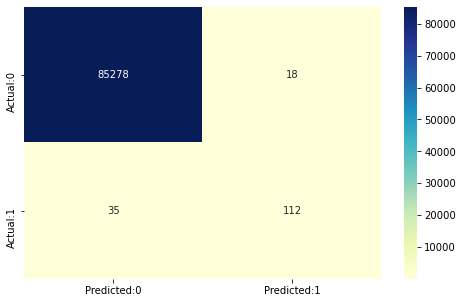

In [109]:
matrix = confusion_matrix(y_test, y_pred_entropy)
conf_matrix = pd.DataFrame(data=matrix,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");
tru_neg= matrix[0,0]
tru_pos= matrix[1,1]
fal_neg= matrix[1,0]
fal_pos= matrix[0,1]

sensitivity = tru_pos/float(tru_pos+fal_neg)
specificity = tru_neg/float(tru_neg+fal_pos)
print(f'Sensitivity = {round(sensitivity,3)}')
print(f'Specificity = {round(specificity,3)}')

### Model 2. Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [111]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size= 0.3, random_state= 0)
x_train_scaled2 = scaler.fit_transform(x_train2)
x_test_scaled2 = scaler.transform(x_test2)

In [112]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train_scaled2, y_train2)

RandomForestClassifier()

In [113]:
y_pred_rf = rf_model.predict(x_test_scaled2)

In [114]:
print("Accuracy:", accuracy_score(y_test2, y_pred_rf)*100)

Accuracy: 99.9531851643786


#### Confusion Matrix

Sensitivity = 0.769
Specificity = 1.0


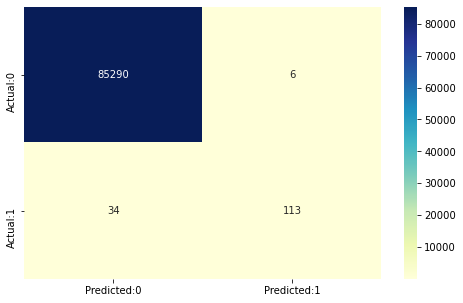

In [115]:
matrix2 = confusion_matrix(y_test2, y_pred_rf)
conf_matrix2 = pd.DataFrame(data=matrix2,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix2, annot=True,fmt='d',cmap="YlGnBu");
tru_neg2= matrix2[0,0]
tru_pos2= matrix2[1,1]
fal_neg2= matrix2[1,0]
fal_pos2= matrix2[0,1]

sensitivity2 = tru_pos2/float(tru_pos2+fal_neg2)
specificity2 = tru_neg2/float(tru_neg2+fal_pos2)
print(f'Sensitivity = {round(sensitivity2,3)}')
print(f'Specificity = {round(specificity2,3)}')

### Model 3. Logical Regression

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [77]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x, y, test_size=0.3, random_state=0)
x_trained3_scaled = scaler.fit_transform(x_train3)
x_test3_scaled = scaler.transform(x_test3)

In [80]:
lr = LogisticRegression()
lr.fit(x_trained3_scaled, y_train3)

LogisticRegression()

#### Confusion Matrix

Sensitivity = 0.619
Specificity = 1.0


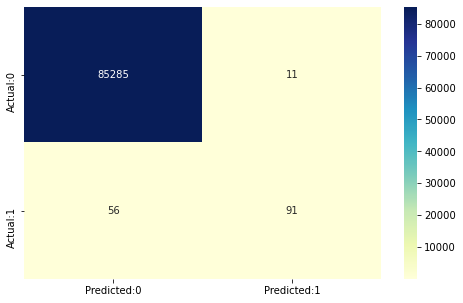

In [97]:
y_pred_lr = lr.predict(x_test3_scaled)
matrix3 = confusion_matrix(y_test3, y_pred_lr)
conf_matrix3 = pd.DataFrame(data=matrix3,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix3, annot=True,fmt='d',cmap="YlGnBu");

tru_neg3= matrix3[0,0]
tru_pos3= matrix3[1,1]
fal_neg3= matrix3[1,0]
fal_pos3= matrix3[0,1]

sensitivity3 = tru_pos3/float(tru_pos3+fal_neg3)
specificity3 = tru_neg3/float(tru_neg3+fal_pos3)
print(f'Sensitivity = {round(sensitivity3,3)}')
print(f'Specificity = {round(specificity3,3)}')